# information about the protocol

$X \in [1;75]$

\begin{array} {|r|l|l|} \hline Y & voltage & stimulus \\ 
\hline
1 & 1 & clockwise (CLW) \\
2 & 2 & counter-clockwise (CCK) \\
3 & 3 & upwards \\
4 & 4 & downwards \\
\hline \end{array}



# Setup

In [1]:
import os
#os.chdir("C:/Users/fischer/notebooks")
from pathdefs import *
os.chdir(SOURCEPATH)
import DirectionTuning_Analyzer as dt
import importlib
importlib.reload(dt)

#import baseClasses as bc

import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy import fft
from scipy import signal
from scipy import stats

#import waipy

In [2]:
%matplotlib notebook

# Load data

In [3]:
folder = os.path.join(DATAPATH,'2020_11_16')
#flist = ['Fly2_G16xU29_age_3d_cell1_direction_tuning_2019_10_25_19_30_57.mat', 'Fly2_G16xU29_age_3d_cell1_direction_tuning_2019_10_25_19_31_40.mat', 'Fly2_G16xU29_age_3d_cell1_direction_tuning_2019_10_25_19_33_07.mat' ]
fname = 'fly1_X20_age_3d_cell1_direction_tuning_2020_11_16_18_26_46.mat'

**single file**

In [4]:
anlyz = dt.DirectionTuning_Analyzer(os.path.join(folder,fname))

**all flies for this fly**

In [30]:
def get_list_this_fly(folder, fname):
    nameparts=fname.split('_')
    flist = os.listdir(folder)
    identifier = '_'.join(nameparts[:5])
    flist = [n for n in flist if n.startswith(identifier)]
    flist = [n for n in flist if 'direction_tuning' in n]
    flist = [n for n in flist if not 'coveredArena' in n ]
    if any([n.endswith('.neomat') for n in flist]):
        print(flist)
        print([n for n in flist if n.endswith('.neomat')])
        assert(sum([n.endswith('.neomat') for n in flist])==1)
    else:
        flist = [n for n in flist if n.endswith('.mat')]
    return flist

In [32]:
flist = get_list_this_fly(folder,fname)
fname=flist[0]
anlyz = dt.DirectionTuning_Analyzer(os.path.join(folder,fname))
for fname in flist[1:]:
    anlyz += dt.DirectionTuning_Analyzer(os.path.join(folder,fname))

anlyz.fileOrigin

{0: 'D:\\RecorderData\\2020_09_15\\fly2_X20_age_5d_cell1_direction_tuning_2020_09_15_15_26_11.mat',
 1: 'D:\\RecorderData\\2020_09_15\\fly2_X20_age_5d_cell1_direction_tuning_2020_09_15_15_35_04.mat'}

## data overview

<IPython.core.display.Javascript object>


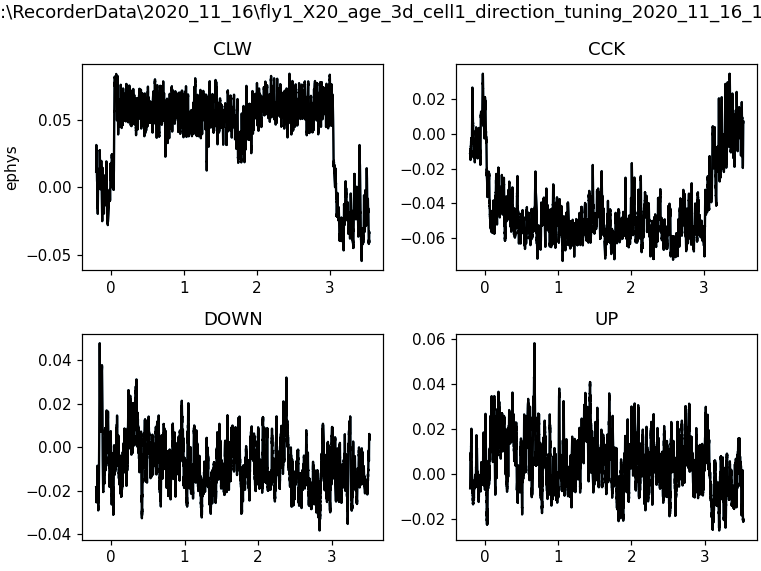

<IPython.core.display.Javascript object>


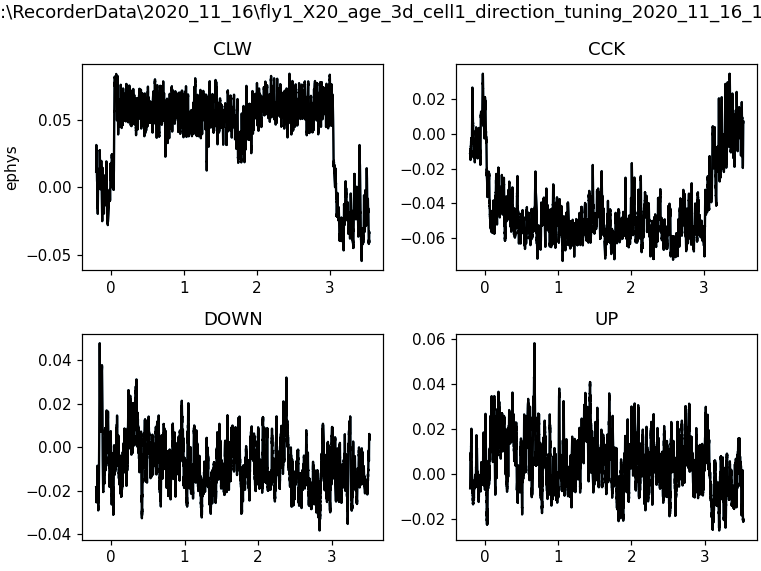

In [55]:
anlyz.plot_by_stimSignal('ephys')

## compare opposing directions

<IPython.core.display.Javascript object>


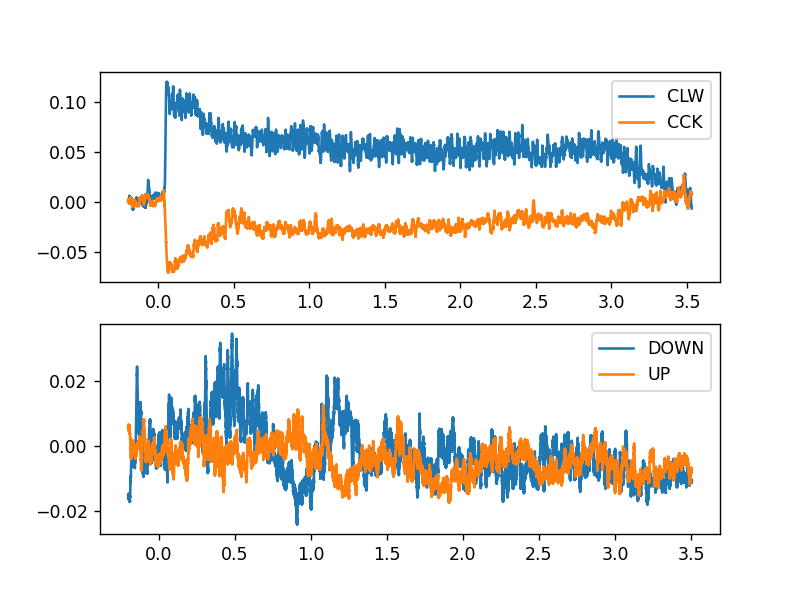

In [25]:
anlyz.compareOpposites('ephys')

## pickling/neomat

##### pickle save

In [60]:
# check froot for correctness
froot = 'D:/RecorderData/'+sumAnlyz.fileOrigin[0][-23:-13]+'/'
froot+sumAnlyz.fileOrigin[0][:-23]+'_all.pickle'

'D:/RecorderData/2020_01_10/Fly2_U29xG16_age_1d_cell1_direction_tuning__all.pickle'

In [61]:
# pickle to save
import pickle
with open(froot+sumAnlyz.fileOrigin[0][:-23]+'_all.pickle','wb') as f:
    pickle.dump(sumAnlyz, f)

**Neomat**

In [28]:
anlyz.write2neomatfile(os.path.join(folder, anlyz.fileOrigin[0][:-23]+'_all.neomat'))

ModuleNotFoundError: No module named 'neo'

# Batch run for all flies

Well, currently not actually all flies, because they are pretty much useless. So doing it only for the list of flies that we use in analysis

In [21]:
def get_sublist_this_fly(flyname, directoryList):
    flyname = flyname.lower()
    sublist = [fname for fname in directoryList if flyname in fname.lower()] 
    sublist = [fname for fname in sublist if 'direction_tuning' in fname]
    sublist = [fname for fname in sublist if fname.endswith('.mat')]
    sublist = [fname for fname in sublist if not 'coveredArena' in fname]
    if any([fname.endswith('___filteredWings.mat') for fname in sublist]):        
        sublist = [fname for fname in sublist if not fname[:-4]+'___filteredWings.mat' in sublist]
    return sublist

In [34]:
blacklist = []
for folder, thisfly in frequentflyers:
    folder=os.path.join('D:/RecorderData', folder)
    print(folder, thisfly)
    dircontent = os.listdir(folder)
    print(thisfly)
    thisflyFilelist = get_sublist_this_fly(thisfly, dircontent)
    print(thisflyFilelist)
    first = True
    for fname in thisflyFilelist:
        if first:
            anlyz = dt.DirectionTuning_Analyzer(os.path.join(folder,fname))
            first = False
        else:
            anlyz += dt.DirectionTuning_Analyzer(os.path.join(folder,fname))
    for seg in anlyz.segments:
        seg.data[anlyz.channelmap['ephys']] *= 100.
    anlyz.average_flywise()
    blacklist.extend([fname for fname in dircontent if thisfly in fname])
    fig = anlyz.plot_by_stimSignal('ephys')
    fig.set_size_inches(15,9)
    ax=fig.get_children()[1:-1]
    ax[1].axhline(-1., linestyle=':', color='k')
    fig.suptitle(anlyz.flyID[0])
    #anlyz.compareOpposites('ephys')
    #anlyz.plot_certain_stimgroup(1, 'ephys')

    fig.savefig(os.path.join(folder, f'{anlyz.flyID[0]}_directionTuningSummary.png'))
    fig.savefig(os.path.join('D:/RecorderData/directionTuningCollection', f'{anlyz.flyID[0]}_directionTuningSummary.png'))    
    del anlyz, fig, ax

D:/RecorderData\2020_09_30 Fly3_X20_age_4d_cell1
Fly3_X20_age_4d_cell1
['Fly3_X20_age_4d_cell1_direction_tuning_2020_09_30_18_27_14.mat', 'Fly3_X20_age_4d_cell1_direction_tuning_2020_09_30_18_47_05.mat']
D:/RecorderData\2019_12_09 Fly1_U29xG16_age_2d_cell2
Fly1_U29xG16_age_2d_cell2
['Fly1_U29xG16_age_2d_cell2_direction_tuning_2019_12_09_19_28_49.mat', 'Fly1_U29xG16_age_2d_cell2_direction_tuning_2019_12_09_19_29_30.mat', 'Fly1_U29xG16_age_2d_cell2_direction_tuning_2019_12_09_19_30_18.mat', 'Fly1_U29xG16_age_2d_cell2_direction_tuning_2019_12_09_19_31_30.mat', 'Fly1_U29xG16_age_2d_cell2_direction_tuning_2019_12_09_19_33_17.mat', 'Fly1_U29xG16_age_2d_cell2_direction_tuning_2019_12_09_19_33_58.mat', 'Fly1_U29xG16_age_2d_cell2_direction_tuning_2019_12_09_19_44_53.mat']
D:/RecorderData\2020_04_20 Fly4_X21_age_3d_cell1_
Fly4_X21_age_3d_cell1_
['fly4_X21_age_3d_cell1_direction_tuning_2020_04_20_19_26_58.mat']
D:/RecorderData\2020_04_17 Fly3_X21_age_5d_cell1_
Fly3_X21_age_5d_cell1_
['Fly3_X21_ag